In [182]:
# ============================================
# Employee Attrition Prediction - Full Pipeline
# ============================================

import pandas as pd
import numpy as np

# ML & Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [183]:
# ============================================
# 1. Load Data
# ============================================

train_df = pd.read_csv("Train_Dataset.csv")
test_df  = pd.read_csv("Test_Dataset.csv")

print("Train Shape:", train_df.shape)
print("Test Shape :", test_df.shape)

Train Shape: (7810, 22)
Test Shape : (2630, 21)


In [184]:
#fix  NaN values  from train and test dataset
#replace NaN values with mode for categorical columns and mean for numerical columns
for col in categorical_cols:
    mode = train_df[col].mode()[0]
    train_df[col].fillna(mode, inplace=True)
    test_df[col].fillna(mode, inplace=True)

for col in numerical_cols:
    mean = train_df[col].mean()
    train_df[col].fillna(mean, inplace=True)
    test_df[col].fillna(mean, inplace=True)


C:\Users\pavi5\AppData\Local\Temp\ipykernel_12040\2576240273.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mean, inplace=True)
C:\Users\pavi5\AppData\Local\Temp\ipykernel_12040\2576240273.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [185]:
#drop target column from test data if exists
if 'Attrition' in test_df.columns:
    test_df = test_df.drop('Attrition', axis=1)
    

In [186]:
train_df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,Divorsed,21674.0


In [187]:
#ML & Preprocessing
#check the data types of the test and train dataframes
print(train_df.dtypes)
print(test_df.dtypes)
#check for any categorical columns in the train and test dataframes
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#remove the target column from the numerical columns list
numerical_cols.remove('Attrition')
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)



EmployeeID            float64
Attrition             float64
Age                   float64
TravelProfile          object
Department             object
HomeToWork            float64
EducationField         object
Gender                 object
HourlnWeek            float64
Involvement           float64
WorkLifeBalance       float64
Designation            object
JobSatisfaction       float64
ESOPs                 float64
NumCompaniesWorked    float64
OverTime              float64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus          object
MonthlyIncome         float64
dtype: object
EmployeeID              int64
Age                   float64
TravelProfile          object
Department             object
HomeToWork            float64
EducationField         object
Gender                 object
HourlnWeek            float64
Involvement             int64
WorkLifeBalance         int64
Designation            obj

In [188]:
#clean up the column names by removing any leading or trailing spaces
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()


In [189]:
#find the missing values in the train and test dataframes
print(train_df.isnull().sum())
print(test_df.isnull().sum())



EmployeeID               0
Attrition             2630
Age                      0
TravelProfile         2630
Department            2754
HomeToWork               0
EducationField        2630
Gender                2676
HourlnWeek               0
Involvement              0
WorkLifeBalance          0
Designation           2668
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear       0
WorkExperience           0
LastPromotion            0
CurrentProfile           0
MaritalStatus         2630
MonthlyIncome            0
dtype: int64
EmployeeID             0
Age                    0
TravelProfile          0
Department            58
HomeToWork             0
EducationField         0
Gender                30
HourlnWeek             0
Involvement            0
WorkLifeBalance        0
Designation           30
JobSatisfaction        0
ESOPs                  0
NumCompaniesWorked     0
OverTime               0
SalaryHikelastYear

In [190]:
#check for the ouliers in the numerical columns using IQR method
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

#bring the outliers to the near to upper and near to lower bounds
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df.loc[train_df[col] < lower_bound, col] = lower_bound
    train_df.loc[train_df[col] > upper_bound, col] = upper_bound

Outliers in EmployeeID: 82
Outliers in Age: 1730
Outliers in HomeToWork: 1085
Outliers in HourlnWeek: 1809
Outliers in Involvement: 2150
Outliers in WorkLifeBalance: 0
Outliers in JobSatisfaction: 847
Outliers in ESOPs: 0
Outliers in NumCompaniesWorked: 1720
Outliers in OverTime: 1624
Outliers in SalaryHikelastYear: 882
Outliers in WorkExperience: 1824
Outliers in LastPromotion: 962
Outliers in CurrentProfile: 2215
Outliers in MonthlyIncome: 933


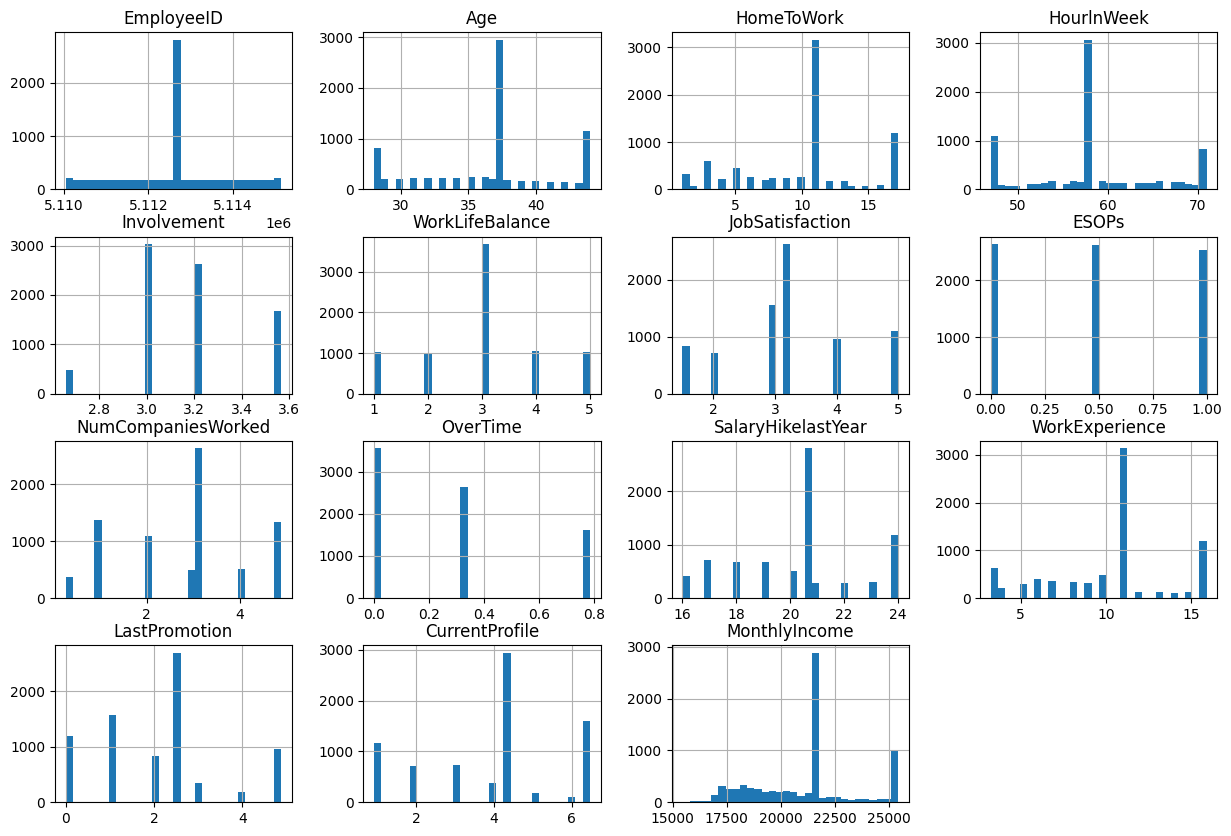

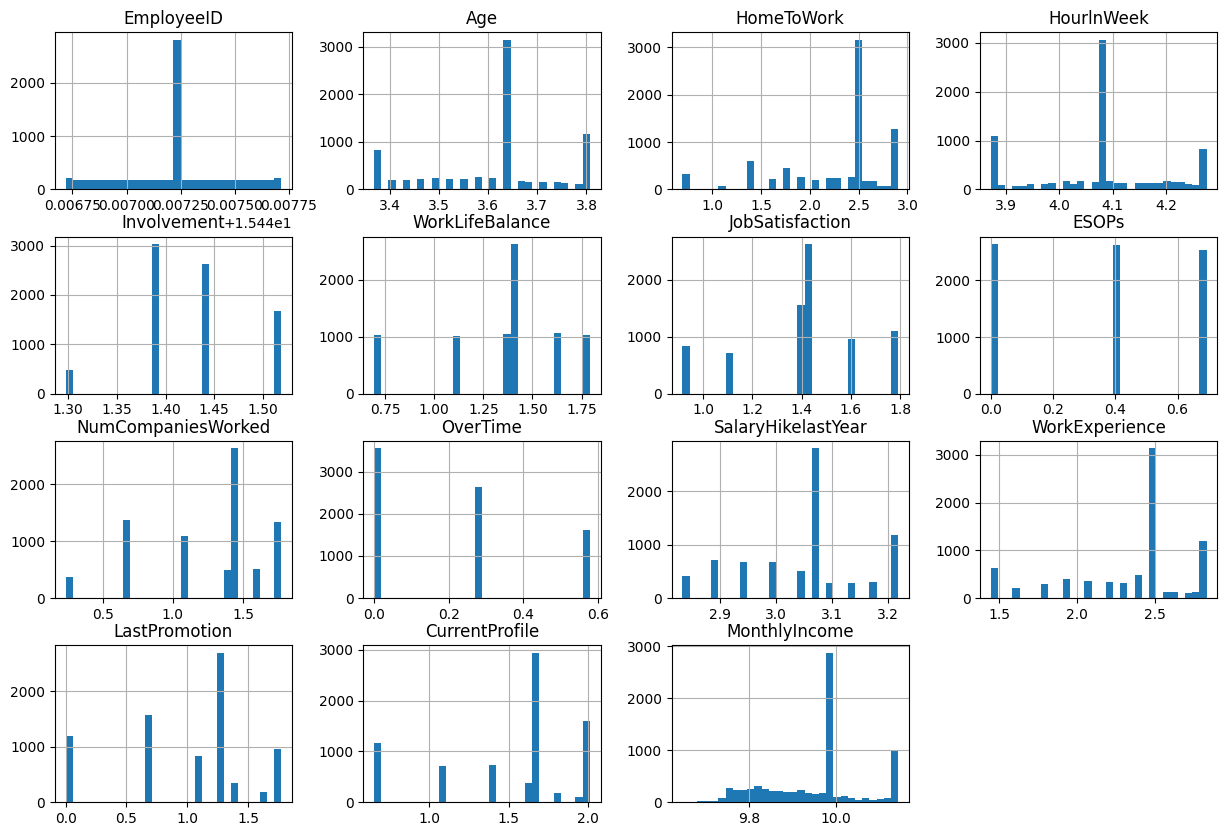

In [191]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column

train_df.drop('Attrition', axis=1).hist(bins=30, figsize=(15, 10))
import matplotlib.pyplot as plt
plt.show()

#it is not normally distributed, we can apply log transformation to make it normally distributed
for col in numerical_cols:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])
#plot the histogram again to check the distribution
train_df.drop('Attrition', axis=1).hist(bins=30, figsize=(15, 10))
plt.show() 

#still not normally distributed, we can try clustering based feature engineering
#if we can cluster the numerical columns using kmeans clustering and add the cluster labels as new feature
# First, define X (features without target)
X = train_df.drop('Attrition', axis=1)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
X['Cluster'] = kmeans.fit_predict(X[numerical_cols])
test_df['Cluster'] = kmeans.predict(test_df[numerical_cols])

In [192]:
#dummy encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)


In [193]:
#Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable
train_df['Attrition'] = train_df['Attrition'].map({'Yes': 1, 'No': 0})


In [194]:
#concatenate train and test dataframes to ensure both have same columns after dummy encoding
combined = pd.concat([train_df, test_df], axis=0, ignore_index=True)


In [195]:
#train data & Test data 
train_data = combined.iloc[:len(train_df), :]
test_data = combined.iloc[len(train_df):, :]

In [196]:
#plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [197]:
#calculate the ROC curve and AUC score
def plot_roc_auc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [198]:
#Preprocessing Pipeline 
numeric_features = numerical_cols + ['Cluster']
categorical_features = [col for col in train_data.columns if col not in numeric_features + ['Attrition']]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [199]:
#instead of split us train all data for training and validate on test data
X = train_data.drop('Attrition', axis=1)
y = train_data['Attrition']


In [200]:
#Baseline Model - Logistic Regression

# Rebuild target variable from original training dataset
original_train_df = pd.read_csv("Train_Dataset.csv")
y = original_train_df["Attrition"].map({"Yes": 1, "No": 0})

# Use processed training data as features, drop (broken) Attrition column
X = train_data.drop(columns=["Attrition"])

# Build a preprocessing pipeline that ignores the Cluster column (all NaN in train_data)
numeric_features_model = [col for col in numeric_features if col != "Cluster" and col in X.columns]
categorical_features_model = [col for col in categorical_features if col in X.columns]

preprocessor_model = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_model),
        ("cat", categorical_transformer, categorical_features_model),
    ]
)

logreg_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor_model),
        ("classifier", LogisticRegression(max_iter=1000)),
    ]
)

logreg_pipeline.fit(X, y)
# Handle any remaining NaN values in X
X = X.fillna(X.mean(numeric_only=True))
# For categorical columns in X, fill with mode
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else 'Unknown')

logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000))])
logreg_pipeline.fit(X, y)


ValueError: Input y contains NaN.